# Data Storytelling

#### Project Overview
The goal of this project is to create a model that can predict whether or not a drug review will have a good rating, based on the review text.

#### Data Overview
| Column Name     | Column Description                          | 
| :---            | :---                                        |
| reviewID        | Unique review ID                            |
| drugName        | Name of drug being reviewed                 |
| condition       | Condition drug was used for                 |
| review          | Review text                                 |
| rating          | Rating from 1 to 10                         |
| date            | Date of review                              |
| usefulCount     | Number of times the review was voted useful |
| char_count      | Number of characters in the original review |
| clean_review    | Cleaned and preprocessed review text        |

#### Data Storytelling Goals
My goals for this step are to: 
1. Visually explore and display feature characteristics
2. Uncover any relationships to evaluate during statistical anaylsis

## 1. Import

In [76]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
sns.set_palette('muted')
from wordcloud import WordCloud

# data import/export
import pickle
from scipy.sparse import load_npz

In [77]:
# import dataset
reviews_df = pd.read_pickle('drugreviews_df')

# import term matrix
term_matrix = load_npz('ngram_csr.npz')

# convert term matrix to dataframe
term_matrix = pd.DataFrame(term_matrix.todense())

# import column headers for dataframe
pickle_in = open('list.pickle', 'rb')
reviews_columns = pickle.load(pickle_in)

# add column headers back to dataframe
term_matrix.columns = reviews_columns

## 2. Review Length

I'm curious whether there's a relationship between word count and rating. I'll explore with some boxplots and see if any trends stand out.

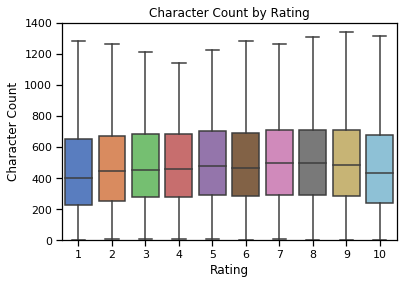

In [78]:
# create boxplots to compare character count by rating
sns.boxplot(x='rating', y='char_count', 
            data=reviews_df, sym='')
plt.title('Character Count by Rating')
plt.ylabel('Character Count')
plt.xlabel('Rating')
plt.ylim(0, 1400)
plt.show()

The median character count is slightly lower for ratings of 1 and 10 than the other ratings. There doesn't appear to be a strong relationship between word count and rating, but I'll evaluate this more in depth during the statistical analysis.

## 3. Drug Name

Let's see what drugs tend to have the highest or lowest scores.

In [79]:
# calculate counts for each drug
drug_counts = reviews_df.drugName.value_counts()

# filter drugs that appear at least 50 times
drugs_50 = drug_counts[drug_counts >= 50].index

# calculate median rating for each drug
drug_median = reviews_df[reviews_df['drugName'].\
                         isin(drugs_50)].\
                         groupby('drugName', axis=0).\
                         agg({'rating':'median'})

# sort drugs by rating descending
drugs_median_sorted = drug_median.sort_values('rating', 
                                              ascending=False)

# display 10 drugs with highest median rating
display('10 drugs with highest median rating: ', 
        drugs_median_sorted[:10])

# display 10 drugs with lowest median rating
display('10 drugs with lowest median rating:', 
        drugs_median_sorted[-10:])

'10 drugs with highest median rating: '

,rating
drugName,
Phentermine,10.0
Soma,10.0
Clonazepam,10.0
Cobicistat / elvitegravir / emtricitabine / tenofovir,10.0
Stribild,10.0
Suboxone,10.0
Subutex,10.0
Ondansetron,10.0
Omalizumab,10.0


'10 drugs with lowest median rating:'

,rating
drugName,
Denosumab,1.0
Belsomra,1.0
Suvorexant,1.0
Miconazole,1.0
Blisovi 24 Fe,1.0
Brimonidine,1.0
Prochlorperazine,1.0
Monistat 7,1.0
Mirvaso,1.0


## 4. Condition

In [80]:
# calculate counts for each condition
condition_counts = reviews_df['condition'].value_counts()

# filter conditions that appear at least 50 times
conditions_50 = condition_counts[condition_counts >= 50].index

# calculate median rating for each condition
condition_median = reviews_df[reviews_df['condition'].\
                              isin(conditions_50)].\
                              groupby('condition', axis=0).\
                              agg({'rating':'median'})

# display 10 conditions with highest median rating
condition_top10 = condition_median.sort_values('rating', 
                                               ascending=False)
display('10 conditions with highest median rating:', 
        condition_top10[0:11])

# display 10 drugs with lowest median rating
condition_bottom10 = condition_median.sort_values('rating', 
                                                  ascending=True)
display('10 conditions with lowest median rating:', 
        condition_bottom10[0:11])

'10 conditions with highest median rating:'

,rating
condition,
COPD,10.0
Melasma,10.0
Gout,10.0
Rhinitis,10.0
"High Cholesterol, Familial Heterozygous",10.0
HIV Infection,10.0
Hyperhidrosis,10.0
Head Lice,10.0
Headache,10.0


'10 conditions with lowest median rating:'

,rating
condition,
Vaginal Yeast Infection,2.0
Abnormal Uterine Bleeding,3.0
Osteoporosis,3.0
Prostatitis,4.0
Keratoconjunctivitis Sicca,4.5
"Constipation, Drug Induced",4.5
Urinary Tract Infection,5.0
"Asthma, acute",5.0
Bladder Infection,5.0


## Most Frequent Words

Bar graphs were created and displayed along with a list of the top 10 most used words for each rating.

In [81]:
def top_terms_by_rating(data, score):
    """Return the top 10 terms for each rating."""
    terms = data[data.rating == score]
    terms = terms.drop('rating', 1)
    top_terms = terms.sum().nlargest(10)
    return top_terms

In [82]:
# create a range from 1 to 10
ratings = range(1, 11)

# create a dict comprehension for top 10 terms by rating
top_terms_dict = {rating : top_terms_by_rating(term_matrix, rating)
                  for rating in ratings}

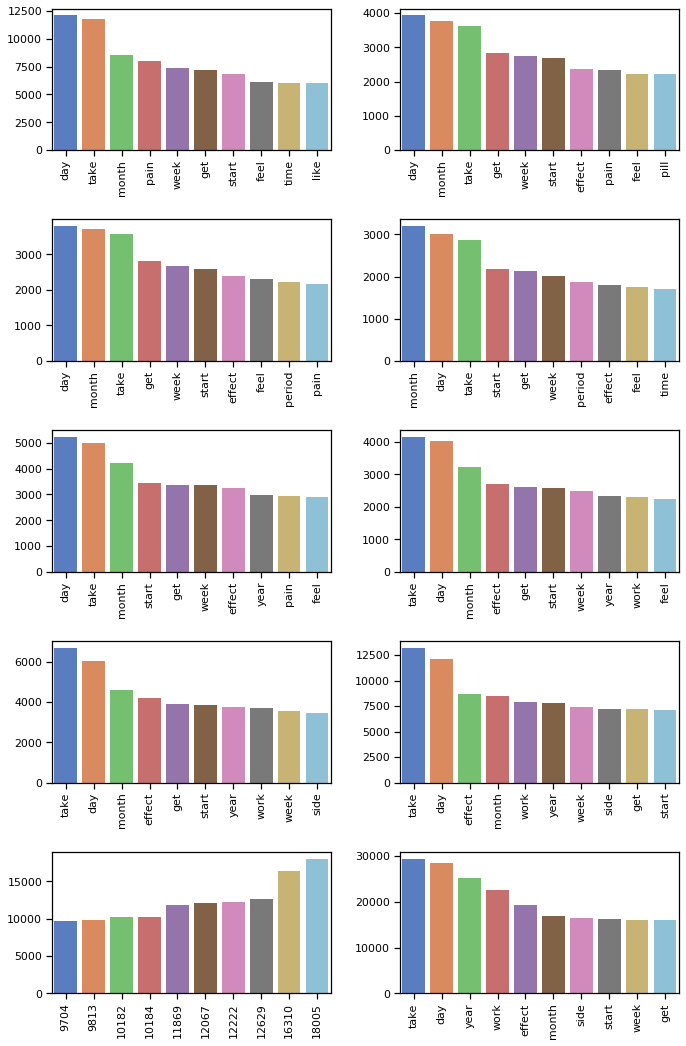

In [83]:
# plot the top 10 words for each rating
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

sns.barplot(top_terms_dict[1].index, top_terms_dict[1].values, 
            ax=axes[0,0])
sns.barplot(top_terms_dict[2].index, top_terms_dict[2].values, 
            ax=axes[0,1])
sns.barplot(top_terms_dict[3].index, top_terms_dict[3].values, 
            ax=axes[1,0])
sns.barplot(top_terms_dict[4].index, top_terms_dict[4].values, 
            ax=axes[1,1])
sns.barplot(top_terms_dict[5].index, top_terms_dict[5].values, 
            ax=axes[2,0])
sns.barplot(top_terms_dict[6].index, top_terms_dict[6].values, 
            ax=axes[2,1])
sns.barplot(top_terms_dict[7].index, top_terms_dict[7].values, 
            ax=axes[3,0])
sns.barplot(top_terms_dict[8].index, top_terms_dict[8].values, 
            ax=axes[3,1])
sns.barplot(top_terms_dict[9], top_terms_dict[9].values, 
            ax=axes[4,0])
sns.barplot(top_terms_dict[10].index, top_terms_dict[10].values, 
            ax=axes[4,1])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout(pad=2)

plt.show()

There's a lot of overlap of terms between ratings. If the performance is low when I get to modeling I may adjust the max_df and re-run count vectorizer to eliminate some more of the most used words.

In [84]:
def wordcloud_text(rating):
    '''Function to return wordcloud text for 
       each rating.'''
    text = ' '.join(review for review in reviews_df
                    [reviews_df['rating'] == rating]
                    ['clean_review'])
    return text

In [85]:
# create a range of ratings
ratings = range(1, 11)

# create a dict comprehension for words by rating
words_by_rating_dict = {rating: wordcloud_text(rating)
                        for rating in ratings}

# create a dict comprehension for wordclouds
wordcloud_dict = {rating: 
                  WordCloud(max_words=100, background_color='white').\
                            generate(words_by_rating_dict[rating])
                  for rating in ratings}

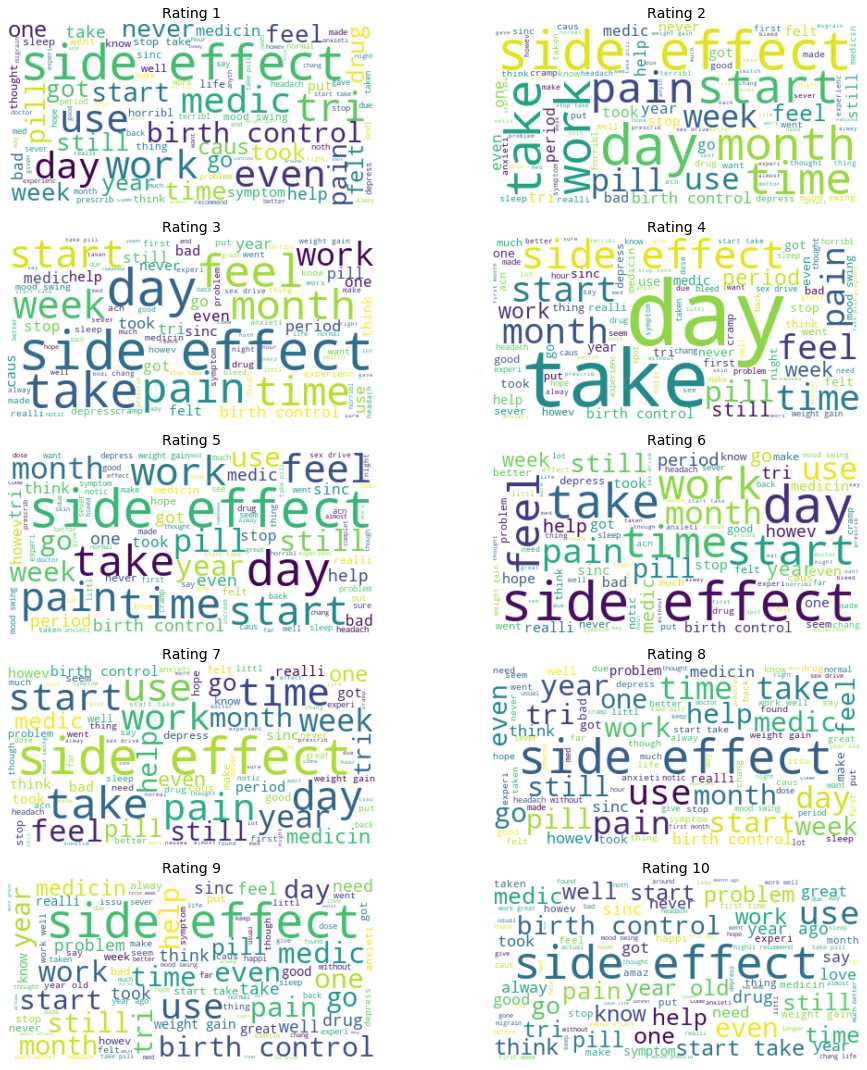

<Figure size 432x288 with 0 Axes>

In [86]:
# plot word clouds
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
plt.figure()

axes[0,0].imshow(wordcloud_dict[1], interpolation='bilinear')
axes[0,1].imshow(wordcloud_dict[2], interpolation='bilinear')
axes[1,0].imshow(wordcloud_dict[3], interpolation='bilinear')
axes[1,1].imshow(wordcloud_dict[4], interpolation='bilinear')
axes[2,0].imshow(wordcloud_dict[5], interpolation='bilinear')
axes[2,1].imshow(wordcloud_dict[6], interpolation='bilinear')
axes[3,0].imshow(wordcloud_dict[7], interpolation='bilinear')
axes[3,1].imshow(wordcloud_dict[8], interpolation='bilinear')
axes[4,0].imshow(wordcloud_dict[9], interpolation='bilinear')
axes[4,1].imshow(wordcloud_dict[10], interpolation='bilinear')

for rating, ax in enumerate(fig.axes, 1):
    ax.axis('off')
    ax.set_title(f'Rating {rating}', fontsize=14)

fig.tight_layout(pad=1)

plt.show()

You can see again here that there is a lot of overlap between ratings. If model performance is low during the machine learning phase I may go back and adjust the max_df used in CountVectorizer.